## Datasets for use with libpysal
As of version 4.2, libpysal has refactored the `examples` package to:

- reduce the size of the source installation
- allow the use of remote datasets from the [Center for Spatial Data Science at the Unversity of Chicago](https://spatial.uchicago.edu/), and other remotes

This notebook highlights the new functionality

## Backwards compatibility is maintained

If you were familiar with previous versions of libpysal, the newest version maintains backwards compatibility so any code that relied on the previous API should work. 

For example:

In [1]:
from libpysal.examples import get_path 


In [2]:
get_path("mexicojoin.dbf")

'/home/serge/Documents/p/pysal/src/subpackages/libpysal/libpysal/examples/mexico/mexicojoin.dbf'

An important thing to note here is that the path to the file for this particular example is within the source distribution that was installed. Such an example data set is now referred to as a `builtin` dataset.

In [3]:
import libpysal
dbf = libpysal.io.open(get_path("mexicojoin.dbf"))

In [4]:
dbf.header

['POLY_ID',
 'AREA',
 'CODE',
 'NAME',
 'PERIMETER',
 'ACRES',
 'HECTARES',
 'PCGDP1940',
 'PCGDP1950',
 'PCGDP1960',
 'PCGDP1970',
 'PCGDP1980',
 'PCGDP1990',
 'PCGDP2000',
 'HANSON03',
 'HANSON98',
 'ESQUIVEL99',
 'INEGI',
 'INEGI2',
 'MAXP',
 'GR4000',
 'GR5000',
 'GR6000',
 'GR7000',
 'GR8000',
 'GR9000',
 'LPCGDP40',
 'LPCGDP50',
 'LPCGDP60',
 'LPCGDP70',
 'LPCGDP80',
 'LPCGDP90',
 'LPCGDP00',
 'TEST']

The function `available` is also available but has been updated to return a Pandas DataFrame. In addition to the builtin datasets, `available` will report on what datasets are available, either as builtin or remotes.

In [5]:
from libpysal.examples import available

In [6]:
df = available()

In [7]:
df.shape

(98, 3)

In [8]:
libpysal.examples.summary()

98 datasets available, 27 installed, 71 remote.


We see that there are 98 total datasets available for use with PySAL. On an initial install (i.e., `examples` has not been used yet), 27 of these are builtin datasets and 71 are remote. The latter can be downloaded and installed.

## Downloading Remote Datasets

In [9]:
df.head()

,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",False
2,Atlanta,"Atlanta, GA region homicide counts and rates",False
3,Baltimore,Baltimore house sales prices and hedonics,False
4,Bostonhsg,Boston housing and neighborhood data,False


The remote `AirBnB` can be installed by calling `load_example`:

In [10]:
airbnb = libpysal.examples.load_example("AirBnB")

In [11]:
libpysal.examples.summary()

98 datasets available, 28 installed, 70 remote.


And we see that the number of remotes as declined by one and the number of installed has increased by 1.

Trying to load an example that doesn't exist will return None and alert the user:

In [12]:
libpysal.examples.load_example('dataset42')

Example not available: dataset42


## Getting remote urls

If the url, rather than the dataset, is needed this can be obtained on a remote with `get_url`. 
As the `Baltimore` dataset has not yet been downloaded in this example, we can grab it's url:

In [13]:
balt_url = libpysal.examples.get_url('Baltimore')
balt_url

'https://geodacenter.github.io/data-and-lab//data/baltimore.zip'

## Explaining a dataset

In [14]:
libpysal.examples.explain('taz')

taz
===

Dataset used for regionalization
--------------------------------

* taz.dbf: attribute data. (k=14)
* taz.shp: Polygon shapefile. (n=4109)
* taz.shx: spatial index.



In [15]:
taz = libpysal.examples.load_example('taz')

In [16]:
taz.get_file_list()

['/home/serge/.local/share/pysal/taz/taz-master/taz.dbf',
 '/home/serge/.local/share/pysal/taz/taz-master/taz.shp',
 '/home/serge/.local/share/pysal/taz/taz-master/README.md',
 '/home/serge/.local/share/pysal/taz/taz-master/taz.shx']

In [17]:
libpysal.examples.explain('Baltimore')

In [18]:
balt = libpysal.examples.load_example('Baltimore')

In [19]:
libpysal.examples.available()

,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",False
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,False
...,...,...,...
93,taz,Traffic Analysis Zones in So. California,True
94,tokyo,Tokyo Mortality data,True
95,us_income,Per-capita income for the lower 48 US states 1...,True
96,virginia,Virginia counties shapefile,True


## Working with an example dataset

`explain` will render maps for an example if available

In [20]:
from libpysal.examples import explain
explain('Tampa1')

In [21]:
from libpysal.examples import load_example
tampa1 = load_example('Tampa1')

In [22]:
tampa1.installed

True

In [23]:
tampa1.get_file_list()

['/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.shp',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.prj',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/2000 Census Data Variables_Documentation.pdf',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.kml',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.dbf',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.kml',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.sbn',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.mif',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.prj',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.sqlite',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.shx',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_final_census2.sbn',
 '/home/serge/.local/share/pysal/Tampa1/TampaMSA/tampa_counties.sbx',
 '/home/serge/.local/share/pysa

In [24]:
tampa_counties_shp = tampa1.load('tampa_counties.shp')

In [25]:
tampa_counties_shp

In [26]:
import geopandas

In [27]:
tampa_df = geopandas.read_file(tampa1.get_path('tampa_counties.shp'))

<AxesSubplot:>

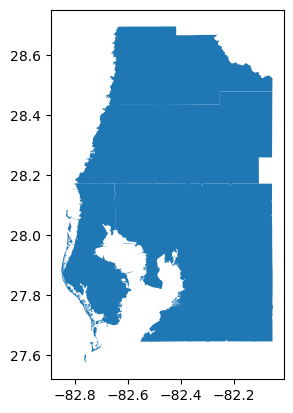

In [28]:
%matplotlib inline
tampa_df.plot()

## Other Remotes

In addition to the remote datasets from the GeoData Data Science Center, there are several large remotes available at github repositories. 

In [29]:
libpysal.examples.explain('Rio Grande do Sul')

Rio_Grande_do_Sul

Cities of the Brazilian State of Rio Grande do Sul
-------------------------------------------------------

* 43MUE250GC_SIR.dbf: attribute data (k=2)
* 43MUE250GC_SIR.shp: Polygon shapefile (n=499)
* 43MUE250GC_SIR.shx: spatial index
* 43MUE250GC_SIR.cpg: encoding file 
* 43MUE250GC_SIR.prj: projection information 
* map_RS_BR.dbf: attribute data (k=3)
* map_RS_BR.shp: Polygon shapefile (no lakes) (n=497)
* map_RS_BR.prj: projection information
* map_RS_BR.shx: spatial index



Source: Renan Xavier Cortes 
Reference: https://github.com/pysal/pysal/issues/889#issuecomment-396693495




Note that the `explain` function generates a textual description of this example dataset - no rendering of the map is done as the source repository does not include that functionality.

In [30]:
rio = libpysal.examples.load_example('Rio Grande do Sul')

In [31]:
libpysal.examples.remote_datasets.datasets # a listing of all remotes

{'AirBnB': <libpysal.examples.base.Example at 0x7febc78c00d0>,
 'Atlanta': <libpysal.examples.base.Example at 0x7febc4a5efb0>,
 'Baltimore': <libpysal.examples.base.Example at 0x7febc4a5ed40>,
 'Bostonhsg': <libpysal.examples.base.Example at 0x7febc4a5ef50>,
 'Buenosaires': <libpysal.examples.base.Example at 0x7febc4a5efe0>,
 'Charleston1': <libpysal.examples.base.Example at 0x7febc4a5ef80>,
 'Charleston2': <libpysal.examples.base.Example at 0x7febc4a5ee90>,
 'Chicago Health': <libpysal.examples.base.Example at 0x7febc4a5ef20>,
 'Chicago commpop': <libpysal.examples.base.Example at 0x7febc4a5f070>,
 'Chicago parcels': <libpysal.examples.base.Example at 0x7febc4a5f0a0>,
 'Chile Labor': <libpysal.examples.base.Example at 0x7febc4a5f100>,
 'Chile Migration': <libpysal.examples.base.Example at 0x7febc4a5f130>,
 'Cincinnati': <libpysal.examples.base.Example at 0x7febc4a5f1f0>,
 'Cleveland': <libpysal.examples.base.Example at 0x7febc4a5f190>,
 'Columbus': <libpysal.examples.base.Example at 0